In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
%config InlineBackend.figure_format='retina'
import io
from google.colab import files
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import sklearn
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
uploaded = files.upload()

Saving Features.csv to Features.csv
Saving Target.csv to Target.csv


In [ ]:
Features = pd.read_csv(io.BytesIO(uploaded['Features.csv']))
#data = S_data.sample(frac=1)
Target = pd.read_csv(io.BytesIO(uploaded['Target.csv']))
#data = S_data.sample(frac=1)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(Features, Target, test_size=0.3, random_state=1)
#####################)____MGCodes______##########################
#Variables
y_train=np.reshape(y_train_S.values, (-1,1))
y_test=np.reshape(y_test_S.values, (-1,1))
scaler_x = StandardScaler()
scaler_y = StandardScaler()
print(scaler_x.fit(X_train_S))
X_train = scaler_x.transform(X_train_S)
print(scaler_x.fit(X_test_S))
X_test = scaler_x.transform(X_test_S)

print(scaler_y.fit(y_train_S.values))
y_train = scaler_y.transform(y_train_S.values)
print(scaler_y.fit(y_test_S.values))
y_test = scaler_y.transform(y_test_S.values)

StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
# Defines "deep" model and its structure
model4 = Sequential()
model4.add(Dense(40, kernel_initializer='normal',input_shape=(22,), activation='relu'))
model4.add(Dense(30, kernel_initializer='normal', activation='relu'))
model4.add(Dense(20, kernel_initializer='normal', activation='relu'))
model4.add(Dense(10, kernel_initializer='normal', activation='relu'))
#model4.add(Dense(10, kernel_initializer='normal', activation='relu'))
#________________OUTPUT_________________________________________
model4.add(Dense(1,))
#_______________________________________________________________
#model.compile(Adam(lr=0.003), 'mean_squared_error')
model4.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001), metrics=['mean_squared_error'])
# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
#earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
#history = model2.fit(X_train, y_train, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 2, callbacks = [earlystopper])
#####################################################################
history = model4.fit(X_train, y_train, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 2)

Epoch 1/2000
18/18 - 1s - loss: 0.9365 - mean_squared_error: 0.9365 - val_loss: 1.1391 - val_mean_squared_error: 1.1391
Epoch 2/2000
18/18 - 0s - loss: 0.8268 - mean_squared_error: 0.8268 - val_loss: 0.9635 - val_mean_squared_error: 0.9635
Epoch 3/2000
18/18 - 0s - loss: 0.7175 - mean_squared_error: 0.7175 - val_loss: 0.9251 - val_mean_squared_error: 0.9251
Epoch 4/2000
18/18 - 0s - loss: 0.6836 - mean_squared_error: 0.6836 - val_loss: 0.8891 - val_mean_squared_error: 0.8891
Epoch 5/2000
18/18 - 0s - loss: 0.6518 - mean_squared_error: 0.6518 - val_loss: 0.8424 - val_mean_squared_error: 0.8424
Epoch 6/2000
18/18 - 0s - loss: 0.5956 - mean_squared_error: 0.5956 - val_loss: 0.7352 - val_mean_squared_error: 0.7352
Epoch 7/2000
18/18 - 0s - loss: 0.4416 - mean_squared_error: 0.4416 - val_loss: 0.4503 - val_mean_squared_error: 0.4503
Epoch 8/2000
18/18 - 0s - loss: 0.1950 - mean_squared_error: 0.1950 - val_loss: 0.1627 - val_mean_squared_error: 0.1627
Epoch 9/2000
18/18 - 0s - loss: 0.0997 -

MAE: 0.06481410000823991
MSE: 0.011465211148383662
RMSE: 0.1070757262332769
The R2 score on the Train set is:	0.993
The R2 score on the Test set is:	0.989


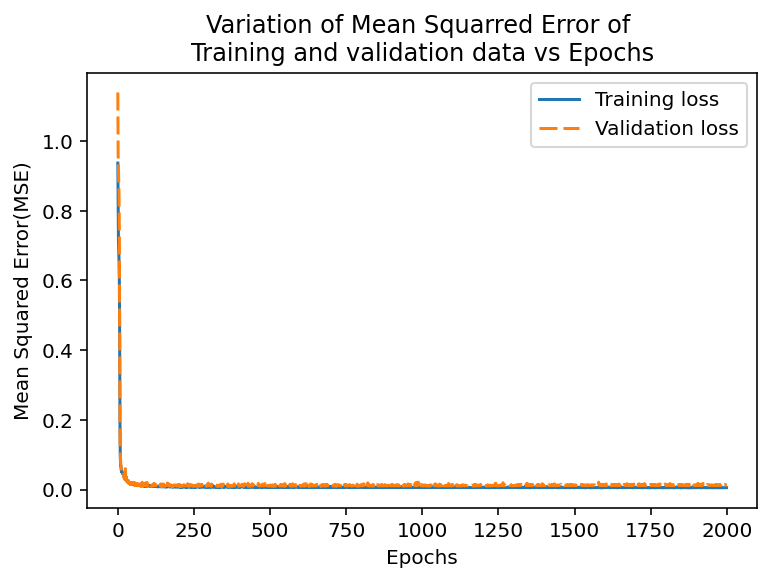

In [ ]:
from sklearn import metrics
prediction=model4.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
# Runs model with its current weights on the training and testing data
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)
# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], dashes=[6, 2])
plt.title( 'Variation of Mean Squarred Error of \nTraining and validation data vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error(MSE)')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

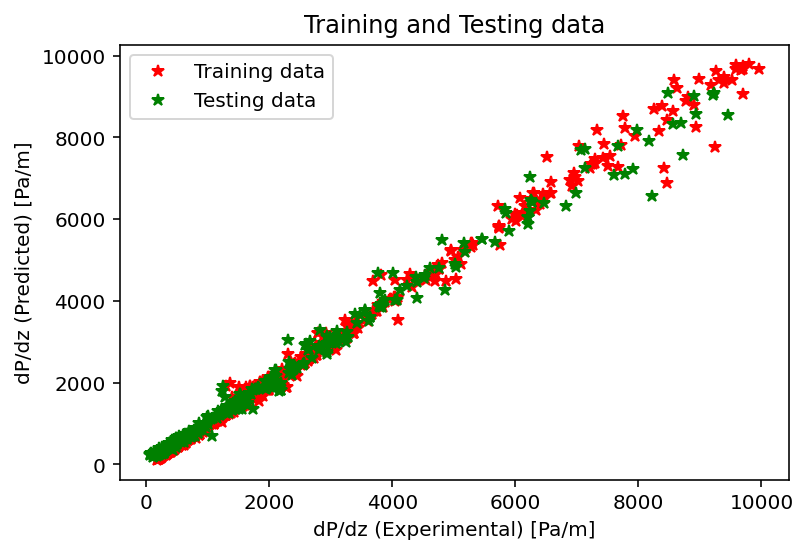

In [ ]:
y_train1      = scaler_y.inverse_transform(y_train) 
y_train_pred1 = scaler_y.inverse_transform(y_train_pred) 
y_test1       = scaler_y.inverse_transform(y_test) 
y_test_pred1  = scaler_y.inverse_transform(y_test_pred) 

plt.plot(y_train1, y_train_pred1,'*r', label = 'Training data' )
plt.plot(y_test1, y_test_pred1, '*g', label = 'Testing data')
plt.title( 'Training and Testing data')
plt.xlabel('dP/dz (Experimental) [Pa/m]')
plt.ylabel('dP/dz (Predicted) [Pa/m]')
plt.legend()
plt.show()

In [ ]:
pip install XlsxWriter

     |████████████████████████████████| 153kB 5.4MB/s 


In [ ]:
uploaded = files.upload()

Saving R7_1_R22.csv to R7_1_R22.csv
Saving R7_1_R134a.csv to R7_1_R134a.csv
Saving R7_1_R410a.csv to R7_1_R410a.csv
Saving R7_2_R22.csv to R7_2_R22.csv
Saving R7_2_R134a.csv to R7_2_R134a.csv
Saving R7_2_R410a.csv to R7_2_R410a.csv
Saving R8_1_150.csv to R8_1_150.csv
Saving R8_1_300.csv to R8_1_300.csv
Saving R8_1_500.csv to R8_1_500.csv
Saving R8_1_600.csv to R8_1_600.csv
Saving R8_2_200.csv to R8_2_200.csv
Saving R8_2_300.csv to R8_2_300.csv
Saving R8_2_350.csv to R8_2_350.csv
Saving R8_2_500.csv to R8_2_500.csv
Saving R22_8mm.csv to R22_8mm.csv
Saving R22_13_8mm.csv to R22_13_8mm.csv
Saving R410_8mm.csv to R410_8mm.csv
Saving R410_13_8mm.csv to R410_13_8mm.csv


#6_1

In [ ]:
R22_8mm= pd.read_csv(io.BytesIO(uploaded['R22_8mm.csv']))
Xnew = R22_8mm
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
#ynew = ynew.tolist()
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df1=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
writer = pd.ExcelWriter('Result_R22_8mm.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R22_13_8mm = pd.read_csv(io.BytesIO(uploaded['R22_13_8mm.csv']))
Xnew = R22_13_8mm
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
#ynew = ynew.tolist()
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df1=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
writer = pd.ExcelWriter('Result_R22_13_8mm.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#6_2

In [ ]:
R410_8mm= pd.read_csv(io.BytesIO(uploaded['R410_8mm.csv']))
Xnew = R410_8mm
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_R410_8mm.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R410_13_8mm = pd.read_csv(io.BytesIO(uploaded['R410_13_8mm.csv']))
Xnew = R410_13_8mm
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_R410_13_8mm.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#7_1

In [ ]:
R7_1_R22 = pd.read_csv(io.BytesIO(uploaded['R7_1_R22.csv']))
Xnew = R7_1_R22
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_7_1_R22.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R7_1_R134a = pd.read_csv(io.BytesIO(uploaded['R7_1_R134a.csv']))
Xnew = R7_1_R134a
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_7_1_R134a.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R7_1_R410a = pd.read_csv(io.BytesIO(uploaded['R7_1_R410a.csv']))
Xnew = R7_1_R410a
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_7_1_R410a.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#7_2

In [ ]:
R7_2_R410a = pd.read_csv(io.BytesIO(uploaded['R7_2_R410a.csv']))
Xnew = R7_2_R410a
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_7_2_R410a.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R7_2_R22 = pd.read_csv(io.BytesIO(uploaded['R7_2_R22.csv']))
Xnew = R7_2_R22
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_7_2_R22.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R7_2_R134a = pd.read_csv(io.BytesIO(uploaded['R7_2_R134a.csv']))
Xnew = R7_2_R134a
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_7_2_R134a.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#8_1

In [ ]:
R8_1_150 = pd.read_csv(io.BytesIO(uploaded['R8_1_150.csv']))
Xnew = R8_1_150
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_8_1_150.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R8_1_300 = pd.read_csv(io.BytesIO(uploaded['R8_1_300.csv']))
Xnew = R8_1_300 
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_8_1_300 .xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R8_1_500 = pd.read_csv(io.BytesIO(uploaded['R8_1_500.csv']))
Xnew = R8_1_500 
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_8_1_500 .xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R8_1_600 = pd.read_csv(io.BytesIO(uploaded['R8_1_600.csv']))
Xnew = R8_1_600 
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_8_1_600 .xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#8_2

In [ ]:
R8_2_200 = pd.read_csv(io.BytesIO(uploaded['R8_2_200.csv']))
Xnew = R8_2_200
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_8_2_200.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R8_2_300 = pd.read_csv(io.BytesIO(uploaded['R8_2_300.csv']))
Xnew = R8_2_300
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_8_2_300.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R8_2_350 = pd.read_csv(io.BytesIO(uploaded['R8_2_350.csv']))
Xnew = R8_2_350
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_8_2_350.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R8_2_500 = pd.read_csv(io.BytesIO(uploaded['R8_2_500.csv']))
Xnew = R8_2_500
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df1=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Result_8_2_500.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#all

In [ ]:
uploaded = files.upload()

Saving Features.csv to Features (1).csv


In [ ]:
Pred_Features = pd.read_csv(io.BytesIO(uploaded['Features.csv']))
Xnew = Pred_Features
Xnew= scaler_x.transform(Xnew)
ynew= model4.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
#ynew = ynew.tolist()
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df1=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
writer = pd.ExcelWriter('Result_Features.xlsx', engine ='xlsxwriter')
df1.to_excel(writer, sheet_name ='Sheet1')
writer.save()